In [1]:
import numpy as np   
import pandas as pd    
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import os
%matplotlib inline

In [2]:
path = os.path.abspath(os.path.join(os.path.dirname('EDA.ipynb'), '..', 'Parsing\\dataframes'))

In [3]:
df = pd.read_csv(path +'\\merged_df.csv')

C:\Users\iavoytenok\AppData\Local\Temp\ipykernel_14536\1671658418.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path +'\\merged_df.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576810 entries, 0 to 576809
Data columns (total 80 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Language                576810 non-null  object 
 1   Set                     576810 non-null  object 
 2   Foil                    576810 non-null  int64  
 3   Quality                 576810 non-null  int64  
 4   Rarity                  576810 non-null  object 
 5   Price                   576810 non-null  int64  
 6   Qty                     576810 non-null  int64  
 7   Name                    576810 non-null  object 
 8   Type                    576810 non-null  object 
 9   Illustrator             569918 non-null  object 
 10  Standard                576810 non-null  object 
 11  Alchemy                 576810 non-null  object 
 12  Pioneer                 576810 non-null  object 
 13  Explorer                576810 non-null  object 
 14  Modern              

In [5]:
df.describe()

,Foil,Quality,Price,Qty,Cost_qty,Legendary,Ability_Deathtouch,Ability_Defender,Ability_Double Strike,Ability_Enchant,...,Action_Transform,Feature length,Month,Year,Features cost,Color cost,Total abilities qty,Abilities only qty,Ability words only qty,Action only qty
count,576810.000000,576810.000000,5.768100e+05,576810.000000,576810.000000,576810.000000,576810.000000,576810.000000,576810.000000,576810.000000,...,576810.000000,576810.000000,576810.000000,576810.000000,576810.000000,5.768100e+05,576810.000000,576810.000000,576810.000000,576810.000000
mean,0.293311,3.589669,2.440285e+02,1.233975,0.971027,0.017945,0.001711,0.001035,0.001186,0.019048,...,0.001397,49.658695,7.268341,2011.286417,1.650739,4.718028e+00,2068.440168,0.310055,0.310055,0.310055
std,0.455280,0.695458,6.279886e+03,3.410392,1.724640,0.132753,0.041331,0.032155,0.034416,0.136693,...,0.037355,67.845782,2.882579,7.632031,1.287366,1.862096e+03,68.554757,0.776495,0.776495,0.776495
min,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1993.000000,0.000000,0.000000e+00,1997.500000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15.000000,5.000000,2005.000000,1.000000,0.000000e+00,2031.500000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15.000000,7.000000,2013.000000,2.000000,0.000000e+00,2038.500000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,7.000000e+01,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,60.000000,10.000000,2018.000000,2.000000,2.000000e+00,2075.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,1.692200e+06,72.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,769.000000,12.000000,2022.000000,102.000000,1.000009e+06,2777.500000,13.000000,13.000000,13.000000


Text(0.5, 1.0, 'Распределение цены')

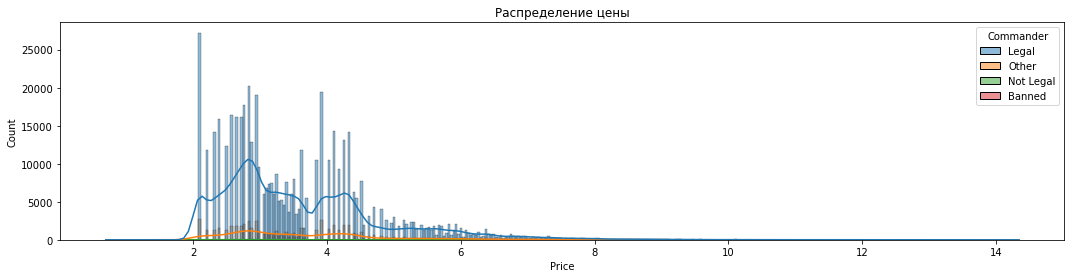

In [6]:
plt.figure(figsize=(18, 4))
sns.histplot(df, x = np.log1p(df['Price']), kde = True, hue = 'Commander')
plt.title('Распределение цены')

Большие хвосты, надо подрезать выбросы

In [7]:
# Подбираем порог адекватной цены, стараемся выкинуть поменьше строк
print(round(len(df[(df['Price'] < 5) | (df['Price'] > 1000)]) / len(df), 3))
df = df[(df['Price'] > 5) & (df['Price'] < 1001)]

0.023


In [8]:
std_skew = skew(df['Price'])
log_skew = skew(np.log1p(df['Price']))
boxcox_skew = skew(stats.boxcox(df['Price'])[0])
print(std_skew, log_skew, boxcox_skew)

3.958343655440306 0.8718522944685484 0.10720259372416652


In [9]:
df['Price'], lmbda = stats.boxcox(df['Price'])

Text(0.5, 1.0, 'Количество лотов по типу карты')

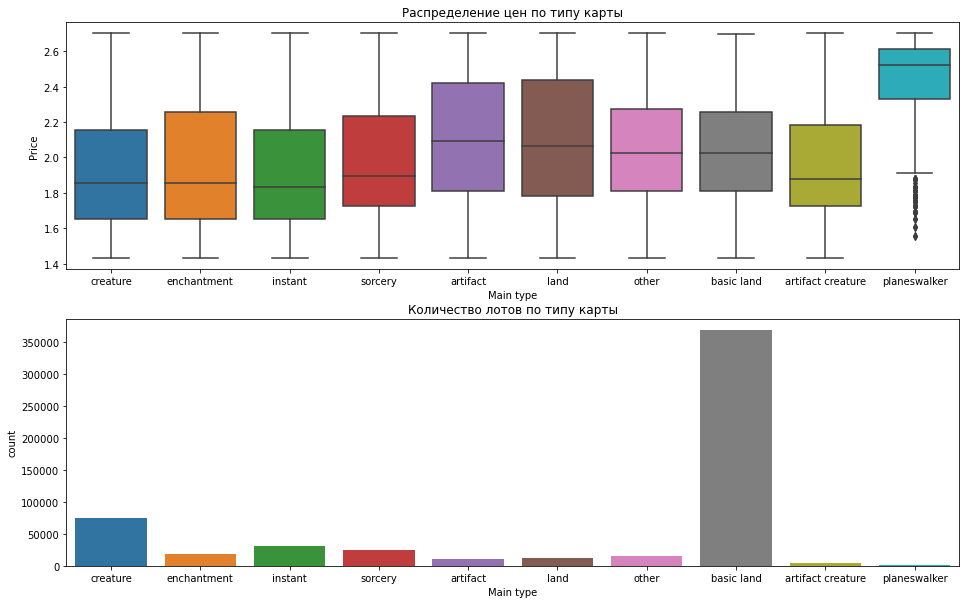

In [10]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 10))
sns.boxplot(x = df['Main type'], y = df['Price'], ax = ax1)
ax1.set_title('Распределение цен по типу карты')
sns.countplot(x = df['Main type'], ax = ax2)
ax2.set_title('Количество лотов по типу карты')

При том, что basic land занимают более половины всех лотов, у них нет никаких критериев функциональности. Только состояние и визуальная составляющая. Таблицу необходимо разделить.

Skewness: 0.10720259372416652 
Kurtosis: -0.824929635565852


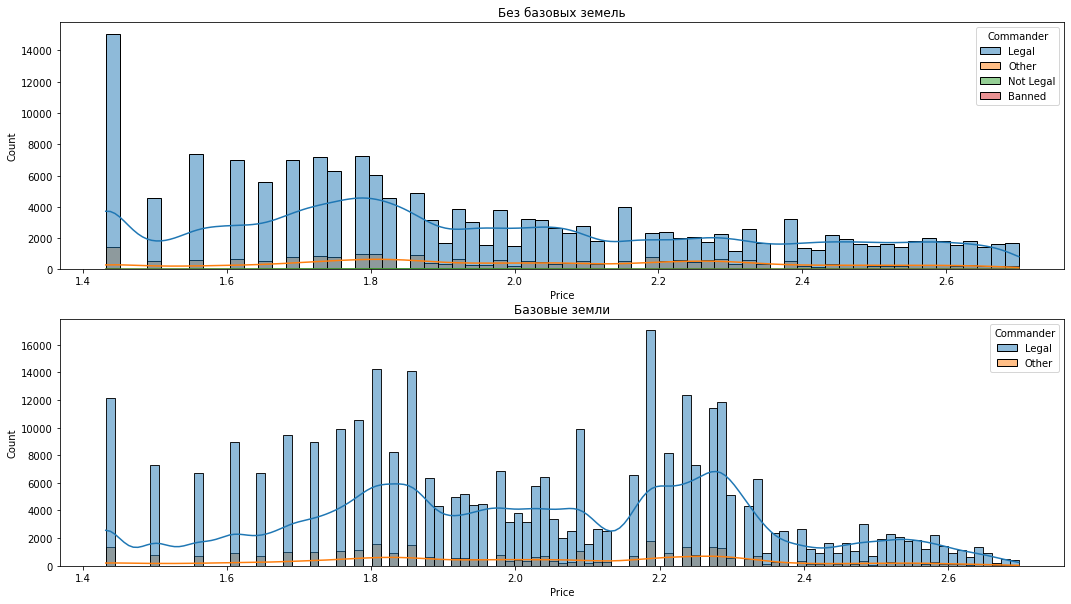

In [11]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18, 10))
bcskew = skew(df['Price'])
bckurtosis = kurtosis(df['Price'])
sns.histplot(data = df[df['Main type'] != 'basic land'], x = 'Price', kde = 'True', hue = 'Commander', ax = ax1)
ax1.set_title('Без базовых земель')
sns.histplot(data = df[df['Main type'] == 'basic land'], x = 'Price', kde = 'True', hue = 'Commander', ax = ax2)
ax2.set_title('Базовые земли')
print(f'Skewness: {bcskew} \nKurtosis: {bckurtosis}')

Для basic lands остается полимодальное распределение, в то время, как другая часть данных похожа на геометрическое распределение

Text(0.5, 1.0, 'Распределение цены от состояния и редкости')

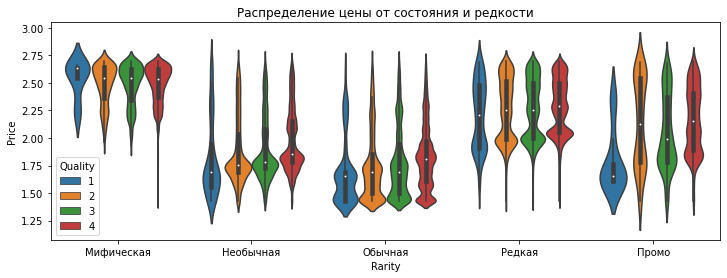

In [12]:
plt.figure(figsize=(12,4))
sns.violinplot(x='Rarity', y='Price', data=df[df['Main type'] != 'basic land'], hue = 'Quality')
plt.title('Распределение цены от состояния и редкости')

Выше редкость - дороже карта. Интересный тренд с качеством: поврежденные карты имеют более плавное распределение, и она растет в разрезе редкости

In [13]:
print('Распределение карт по редкости\n',
      df['Rarity'].value_counts(normalize=True).reset_index(), 
      '\nРаспределение карт по редкости без земель\n',
      df[df['Main type'] != 'basic land']['Rarity'].value_counts(normalize=True).reset_index())

Распределение карт по редкости
         index    Rarity
0     Обычная  0.806195
1   Необычная  0.096319
2      Редкая  0.071878
3       Промо  0.014778
4  Мифическая  0.010830 
Распределение карт по редкости без земель
         index    Rarity
0     Обычная  0.469121
1   Необычная  0.277720
2      Редкая  0.207249
3  Мифическая  0.031227
4       Промо  0.014683


Земли вносят шум только в обычные карты, но их большинство

<Figure size 1296x576 with 0 Axes>

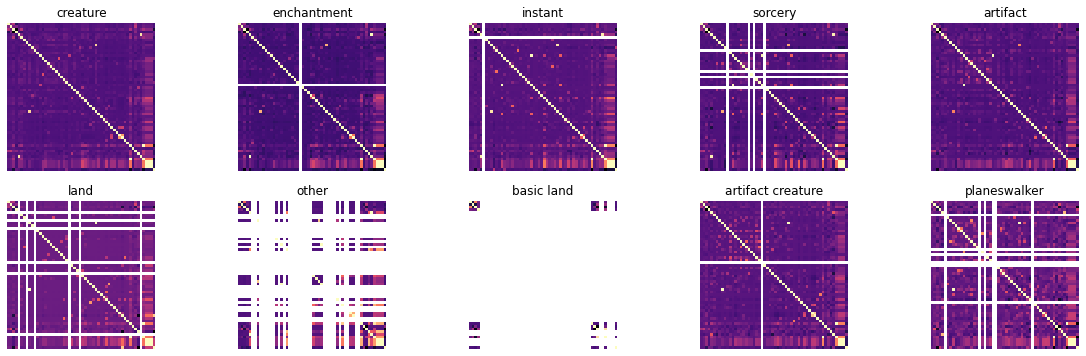

In [38]:
plt.figure(figsize=(18,8))
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))
ax_1 = ax_x = ax_y = 0
for m_type in df['Main type'].unique():
    sns.heatmap(df[df['Main type'] == m_type].corr(), cmap = 'magma', square=True, ax =ax[(ax_x,ax_y)], cbar = False, xticklabels=False, yticklabels=False)
    ax[(ax_x,ax_y)].set_title(m_type)
    ax_1 += 1
    ax_x = ax_1 // 5
    ax_y = ax_1 % 5

Помимо basic land и other, типы имеют схожую корреляционную матр

In [15]:
# Смотрим парные регрессии для небинарных фич
nonbin_col = []
for col in df.columns.tolist():
    if df[col].nunique() > 2:
        nonbin_col.append(col)

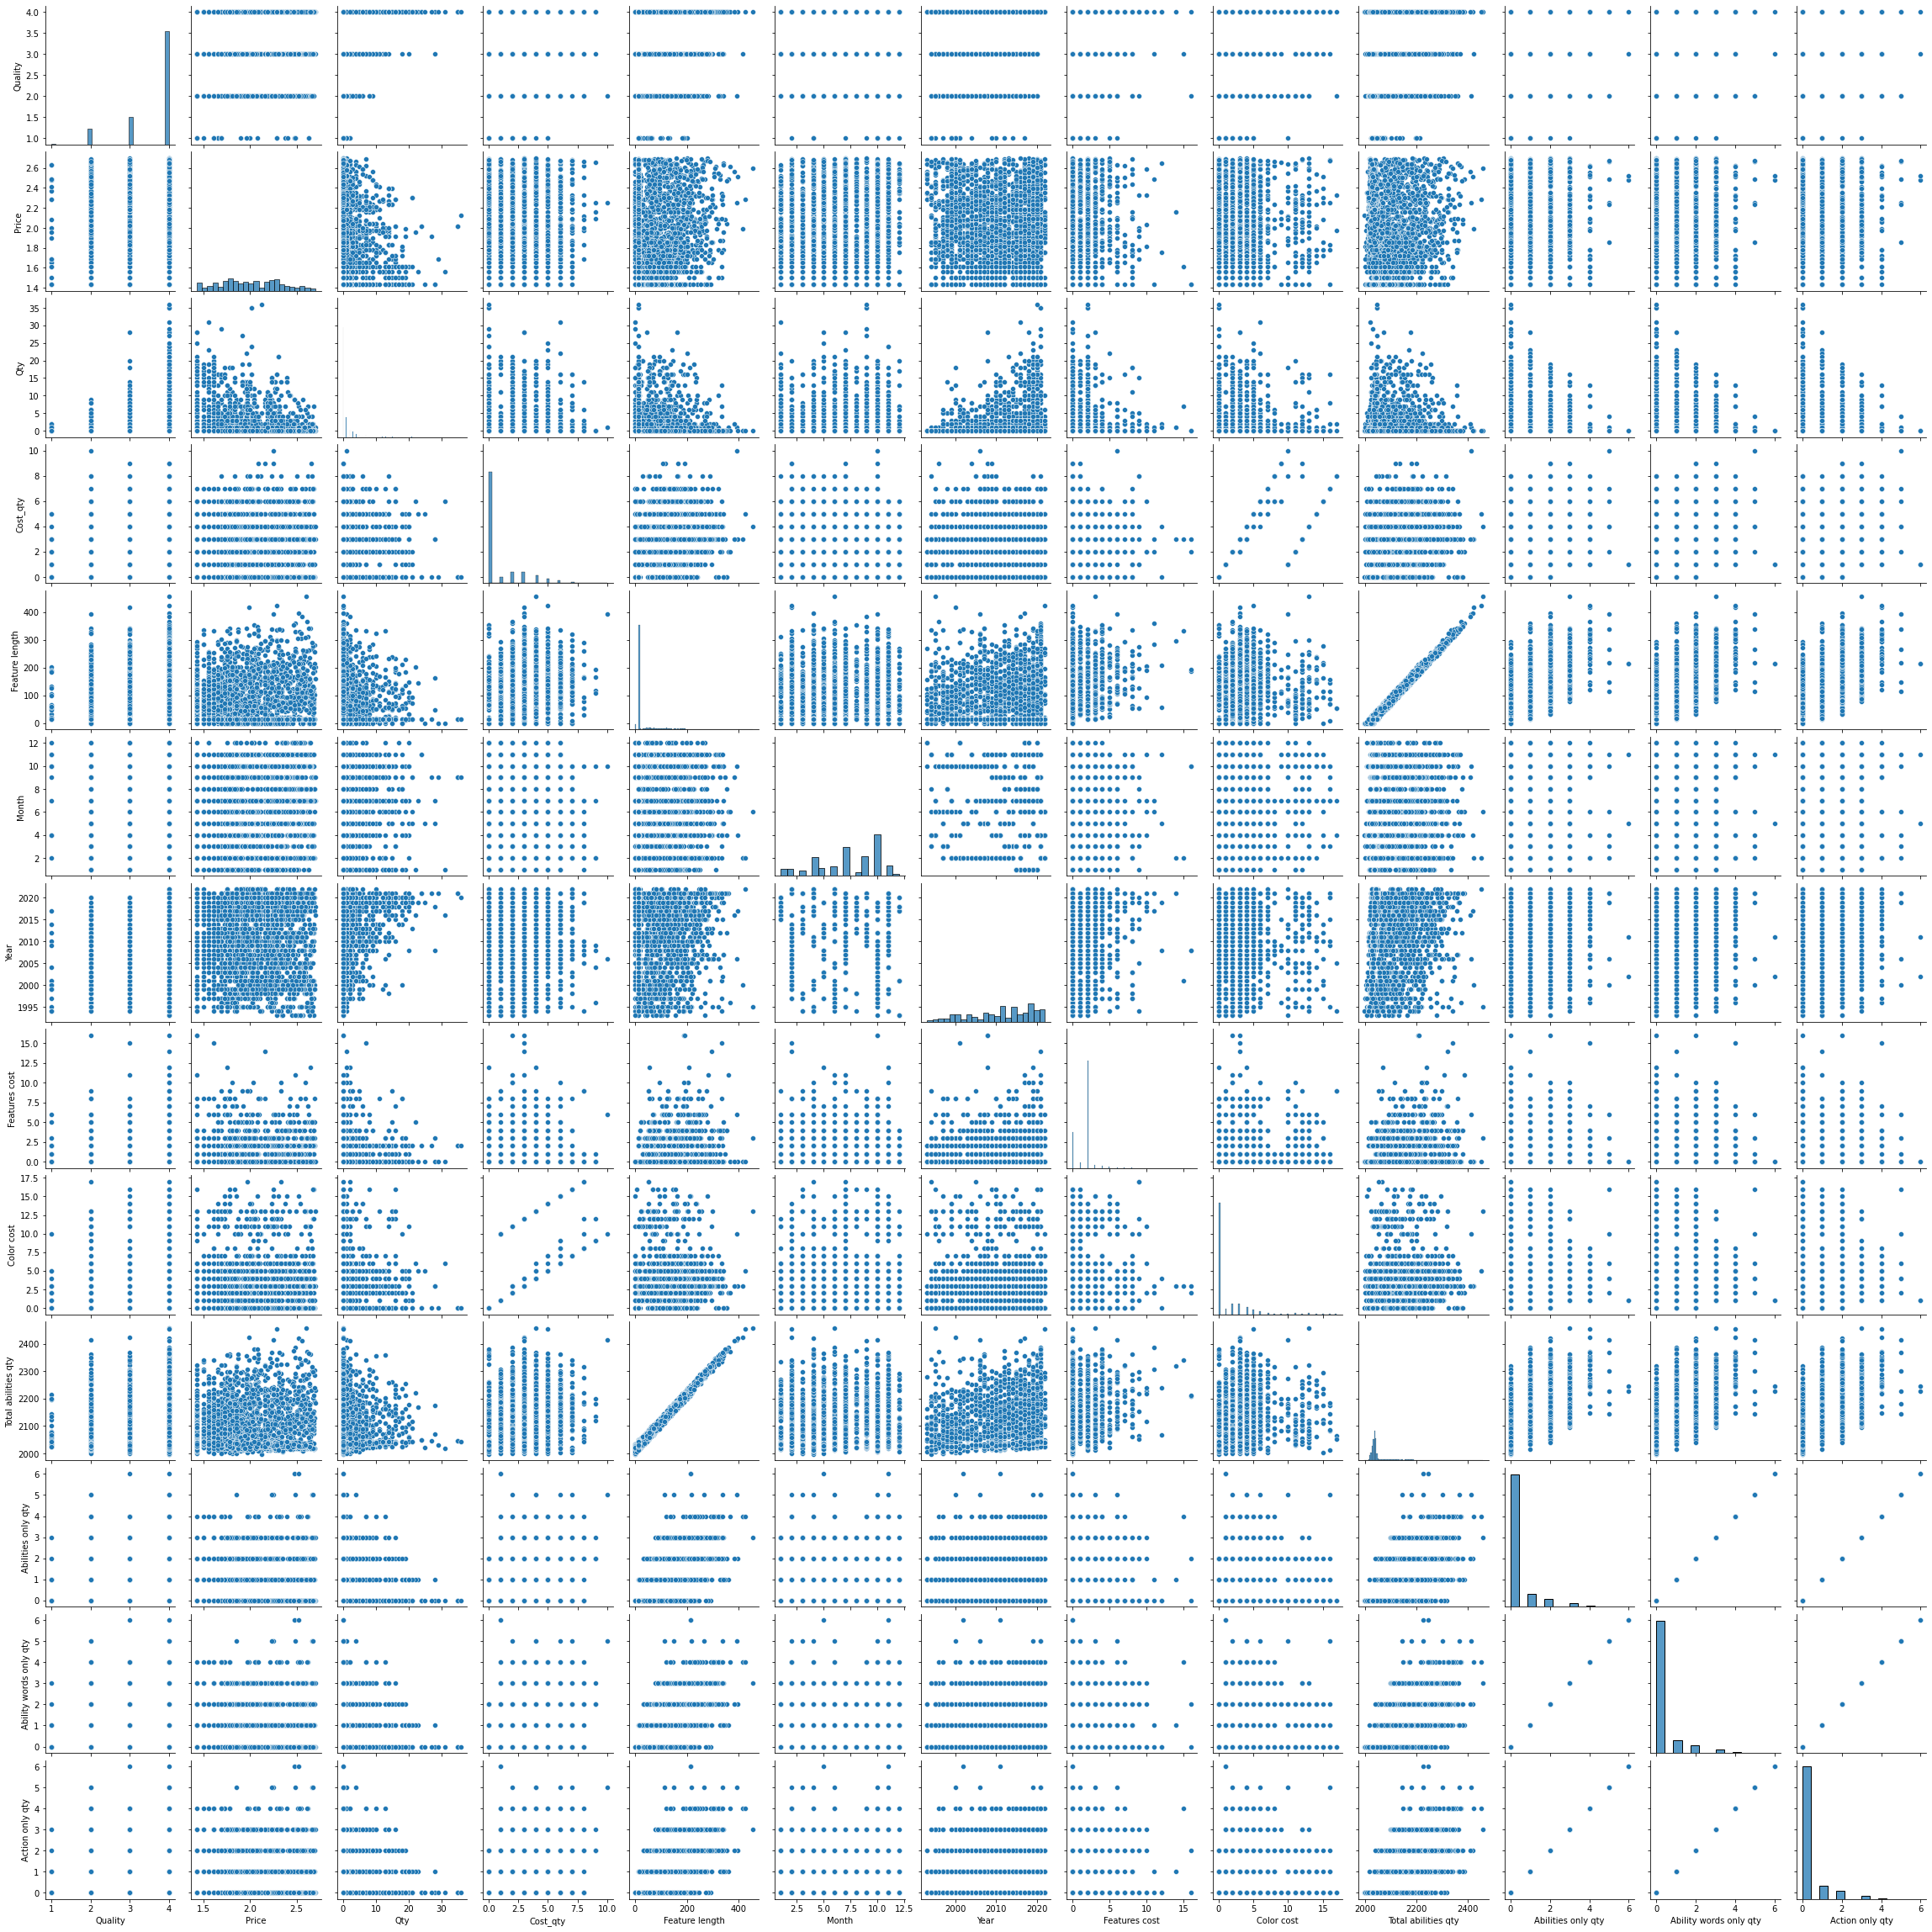

In [16]:
# Долго вычисляется, приходится смотреть по выборке
sns.pairplot(df[nonbin_col].sample(5000))

Feature engeneering

In [17]:
# Находим общее кол-во карт в продаже по имени
total_qty_dict = df.groupby('Name').sum()['Qty'].to_dict()
df['Qty_total'] = df['Name'].map(total_qty_dict)
df.head()

,Language,Set,Foil,Quality,Rarity,Price,Qty,Name,Type,Illustrator,...,Year,Colors_features,Features cost,Colors_dist,Color cost,Total abilities qty,Abilities only qty,Ability words only qty,Action only qty,Qty_total
0,Английский,Ixalan,0,4,Мифическая,2.478846,5,Admiral Beckett Brass,Legendary Creature — Human Pirate,Jason Rainville,...,2017,NaN,0,UBR,4,2226.0,1,1,1,10
1,Английский,Ixalan,0,3,Мифическая,2.448057,0,Admiral Beckett Brass,Legendary Creature — Human Pirate,Jason Rainville,...,2017,NaN,0,UBR,4,2226.0,1,1,1,10
4,Английский,Ixalan,0,4,Мифическая,2.469349,5,Admiral Beckett Brass,Legendary Creature — Human Pirate,Jason Rainville,...,2017,NaN,0,UBR,4,2226.0,1,1,1,10
7,Английский,Ixalan,0,4,Необычная,2.034922,2,Adanto Vanguard,Creature — Vampire Soldier,Anna Steinbauer,...,2017,NaN,0,W,2,2209.0,2,2,2,5
8,Английский,Ixalan,1,4,Необычная,2.459121,1,Adanto Vanguard,Creature — Vampire Soldier,Anna Steinbauer,...,2017,NaN,0,W,2,2209.0,2,2,2,5


In [18]:
df['Quality'].unique()

array([4, 3, 2, 1], dtype=int64)

In [19]:
df['Main feature'].fillna('', inplace = True)
# df['Cost'].fillna('', inplace = True)